# Proyecto Modulo 2

### "Análisis de rendimientos de compañías telefonicas y predicciones de precios para el año 2020"

### Integrantes:
- Estephanie López 
- Francisco Maldonado
- Adolfo Mariscal 
- Xareny Gonzalez

**Objetivo general:**
+ Elaborar un análisis de precios y rendimientos accionarios de compañias telefonicas.

**Objetivos específicos:**
+ Investigar los valores accionarios del periodo 2018-2019 de empresas de celulares reconocidas. 
+ Calcular los rendimientos porcentuales de las compañías anteriores.
+ Predecir precios accionarios del próximo año para cada empresa correspondiente.

**Planteamiento del proyecto**

Durante el estudio de este modulo, se han visto en clase los siguientes temas: Simulación Montecarlo, Integración Montecarlo, Fractales Aleatorios y Probabilidad Precio Umbral. Para la elaboración de este proyecto, se eligió el último tópico, ya que todos los integrantes del equipo son estudiantes de finanzas. Se decidió poner en desarrollar el tema de Probabilidad Precio Umbral porque es el más relacionado al área de nuestra carrera. 

El proyecto conciste en un análisis considerablemente detallado acerca de los valores accionarios que las empresas Apple, Samsung, Nokia y Motorola generaron desde el inicio del año 2018 hasta la actualidad. Con ellos se calcularan los rendimientos en un determinado periodo de tiempo mediante el uso de un sistema probabilístico.

Al final, con los resultados obtenidos, se calcularan matematicamente una lista de posibles precios accionarios futuros y se daran a conocer nuestras conclusiones finales.

**Modelo del problema**

Para importar los datos historícos se hará uso de una función que extraiga el cúmulo de datos del sitio web "Yahoo Finanzas". Dicha función requerirá los siguientes parámetros:
+ El nombre del conjunto de acciones (**names**).
+ La fecha de inicio de los datos (**start**).
+ La fecha de límite de los datos (**end**).

Al ejecutar dicha función se le agregará el operador "*.dropna*" para que las filas de valores que serán representados en una tabla de formato pandas no contengan celdas sin valores.

Más tarde, se procesaran los precios mediante una función logarítmica para calcular los rendimientos diarios.

Después se calculará la media y la desviación estandar de los rendimentos obtenidos. Esto se debe a que para calcular los rendimientos futuros por medio de un proceso probabilístico se necesita utilizar la fórmula de la densidad de la distribuición normal, la cual es:

$$1/(\sigma\sqrt(2\pi))\exp(-(x-\mu)^2)/2\sigma^2$$

En donde $\sigma$ representa la varianza, o en nuestro caso la desviación estandar; $\mu$ representa la media muestral y $x$ representa la variable del sistema. En nuestro caso, se contará con cuatro ecuaciones probabilísticas, cada una con sus respectivas desviaciones estandar y medias muestrales. La simbología que se usará sera **"std"** para la desviaciónes estandar y se agregará la *inicial de la empresa* al término; del mismo modo se hará con la media muestral y la simulación de rendimientos, solo que su simbología será **"mu"** y **"Sim_Ret"** más correspondientemente. 

Después se aplicará la fórmula anterior para definir una función que simule escenarios aleatorios de los próximos rendimientos en un intervalo determinado. Dicha función tendrá los siguientes parametros:
+ La media (**mu**).
+ La desviación estandar (**std**).
+ El ciclo en días (**ndays**).
+ El número de escenarios requeridos (**nscen**).
+ La fecha de inicio de la predicción (**fecha_inicio**).



In [1]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Se importa el historico
def get_close(names,start,end):
    close=web.DataReader(name=names,data_source='yahoo',start=start,end=end)
    return close['Adj Close']

In [3]:
#Instrumentos
nombres=['AAPL','NOK','SMSN.IL','MSI']
# Fechas de interés (inicio y fin): 2013-2017
fecha_inicio='2018-01-01'
fecha_fin='2019-11-19'
# Función DataReader
closes = get_close(nombres,fecha_inicio,fecha_fin).dropna()
print("Esta es la tabla de datos con la cual se trabajará")
closes

Esta es la tabla de datos con la cual se trabajará


Symbols,AAPL,MSI,NOK,SMSN.IL
Date,,,,
2018-01-02,167.199890,87.968353,4.477365,121000.0
2018-01-03,167.170776,87.346588,4.543208,122300.0
2018-01-04,167.947266,88.075211,4.599646,120800.0
2018-01-05,169.859406,89.260422,4.627864,123500.0
2018-01-08,169.228500,90.173622,4.590240,121800.0
2018-01-09,169.209091,89.493599,4.609052,118900.0
2018-01-10,169.170258,89.746170,4.562021,113800.0
2018-01-11,170.131180,90.882820,4.533802,113200.0
2018-01-12,171.888031,93.816704,4.580833,114000.0


**Solución del problema y sus respectivas gráficas**

Los datos de la anterior tabla éstan representados por la gráfica debajo.


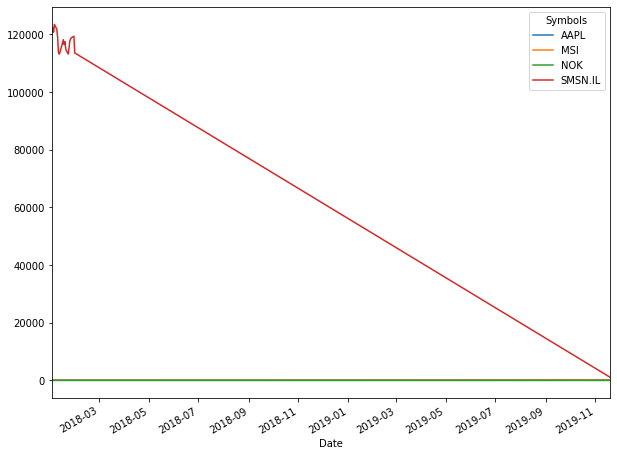

In [4]:
print("Los datos de la anterior tabla éstan representados por la gráfica debajo.")
closes.plot(figsize=(10,8));

**En este caso, la simbología es la siguiente:**
+ *AAPL* representa a Apple Inc.
+ *NOK* representa a Nokia Corporation.
+ *SMSN.IL* representa a SAMSUNG ELECTRONICS CO LTD.
+ *MSI* representa a Motorola Solutions, Inc..

In [5]:
#Simulacion de rendimientos diarios
# Calcular a diferencia logarítmica de precios y graficarlos
St=closes
St1=closes.shift()

Esta es la gráfica de los rendimientos diarios


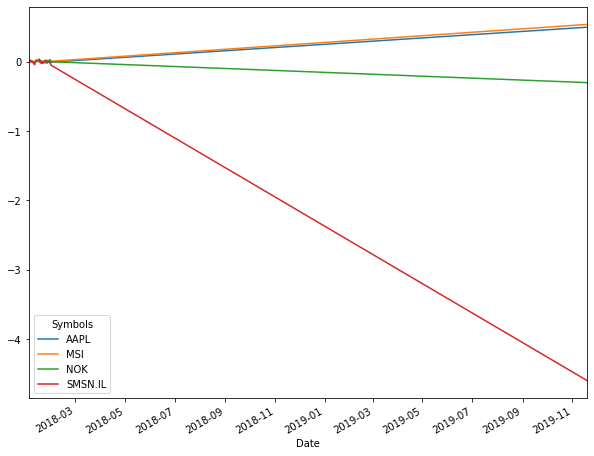

In [6]:
Ret=(np.log(St/St1)).dropna()
print("Esta es la gráfica de los rendimientos diarios")
Ret.plot(figsize=(10,8));

In [7]:
# Calculamos media 
muf=Ret.mean().AAPL #Apple
muv=Ret.mean().NOK #Nokia
muh=Ret.mean()['SMSN.IL'] #Samsung
mun=Ret.mean().MSI #Motorola


print('El calculo de las medias es:')
muf,muv,muh,mun

El calculo de las medias es:


(0.023314820798730942,
 -0.013033017808156721,
 -0.2331067080392034,
 0.03177613090189339)

In [8]:
# Calculamos desviación estándar
stdf=Ret.std().AAPL  #Apple
stdv=Ret.std().NOK #Nokia
stdh=Ret.std()['SMSN.IL'] #Samsung
stdn=Ret.std().MSI #Motorola
print('El calculo de la desviación estándar es:')
stdf,stdv,stdh,stdn

El calculo de la desviación estándar es:


(0.11200703637122579,
 0.06917232200275188,
 1.0278610986705388,
 0.11968792239962076)

In [9]:
#Se define una función para simular diversos escenarios de rendimientos. 
def ret_simu(mu,std,ndays,nscen,fecha_inicio):
    dias = pd.date_range(start=fecha_inicio,periods=ndays)
    f_norm = std*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(data=f_norm,index=dias)

In [10]:
ndays = 407   #Este es el número de días restantes del 2019 más el año 2020
nscen = 50
fecha_inicio = "2019-11-19"

sim_Ret_A = ret_simu(muf,stdf,ndays,nscen,fecha_inicio)

sim_Ret_N = ret_simu(muv,stdv,ndays,nscen,fecha_inicio)

sim_Ret_S = ret_simu(muh,stdh,ndays,nscen,fecha_inicio)

sim_Ret_M = ret_simu(mun,stdn,ndays,nscen,fecha_inicio)

In [11]:
print("Esta es la simulación de rendimientos de Apple Inc")
sim_Ret_A

Esta es la simulación de rendimientos de Apple Inc


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-11-19,0.097926,-0.091767,-0.015122,-0.208957,0.167197,0.024017,-0.107113,-0.055230,0.052663,0.033182,...,-0.017111,-0.091480,0.047852,0.084536,-0.055385,0.253137,-0.027273,-0.197851,0.155438,-0.149717
2019-11-20,-0.048662,0.200326,0.210912,0.134724,0.062183,0.043911,0.078223,0.023933,-0.036779,0.105133,...,0.057669,0.066409,0.005919,0.070223,0.128949,-0.114817,0.303021,-0.128845,0.007708,0.184049
2019-11-21,0.039856,-0.019060,-0.045189,0.120241,0.063744,0.153420,0.131284,-0.054475,0.292326,0.025529,...,-0.009077,0.003302,0.070615,-0.025385,0.023723,0.116392,0.063865,-0.025051,-0.030018,-0.008405
2019-11-22,0.064562,0.088298,-0.031387,0.065307,-0.084378,-0.039481,-0.049624,0.161007,-0.117241,-0.010669,...,-0.105476,-0.183367,0.025870,0.061012,-0.095155,-0.061489,-0.108437,0.044867,-0.014081,0.063744
2019-11-23,0.253734,-0.020462,-0.034431,0.155281,-0.018592,-0.175165,-0.022782,-0.211531,0.094780,-0.103332,...,0.098750,-0.022756,0.095125,0.194275,-0.118257,0.046066,-0.117936,0.037814,-0.097620,0.105194
2019-11-24,-0.017094,-0.094042,0.142624,-0.040614,0.029790,-0.154496,-0.004730,0.189732,0.048702,-0.056811,...,0.161496,-0.103914,-0.028117,0.014016,0.155444,0.045304,0.019107,-0.034787,-0.090870,0.140719
2019-11-25,0.050797,-0.050208,-0.150978,-0.153526,0.128228,-0.062228,0.029938,0.173442,0.146080,0.127996,...,0.083528,0.060152,-0.017484,-0.111331,0.120132,0.013392,0.078194,0.049827,-0.241550,0.172725
2019-11-26,-0.059623,0.121890,-0.151471,0.031687,0.096045,-0.032261,0.098924,0.054401,0.080696,0.009810,...,0.171016,-0.026697,-0.036146,0.012917,0.043472,0.037164,0.036623,0.116722,-0.065695,0.118067
2019-11-27,-0.044689,0.025183,0.175647,-0.055962,-0.036182,0.250683,-0.053656,0.030574,-0.197161,0.081584,...,-0.142176,-0.080958,-0.023437,0.199158,0.227352,-0.147617,-0.158575,0.070642,0.118798,-0.030714
2019-11-28,-0.044534,0.072497,-0.004808,0.049590,0.048598,0.167983,0.124385,-0.085367,0.149865,-0.070445,...,-0.044573,-0.099493,0.139252,0.003950,-0.190512,0.153019,0.230610,0.150689,-0.060511,0.048959


In [12]:
print("Esta es la simulación de rendimientos de Nokia Corporation.")
sim_Ret_N

Esta es la simulación de rendimientos de Nokia Corporation.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-11-19,-0.016706,-0.014569,-0.096567,-0.124217,0.069581,0.097736,-0.029406,-0.099939,-0.079728,-0.024755,...,-0.014822,0.120910,0.069653,0.071265,0.022708,0.009049,0.055886,-0.074033,0.100657,-0.032919
2019-11-20,-0.036385,0.001338,0.027432,-0.052249,0.027573,-0.083744,-0.027337,0.009639,0.112231,-0.103690,...,-0.074804,-0.069925,-0.022809,-0.027370,0.033252,0.053649,0.001001,-0.145265,0.033018,-0.097046
2019-11-21,0.033786,0.123301,0.078307,-0.015989,-0.132827,-0.029554,-0.036337,-0.115879,0.073041,0.041233,...,-0.090439,0.037580,0.051313,0.023982,0.060521,0.058162,0.026005,0.004072,0.026482,-0.027349
2019-11-22,-0.005759,0.021845,0.011685,0.011163,-0.105916,-0.122337,0.043563,0.084944,0.109094,-0.005115,...,0.046317,-0.150764,-0.053269,0.070939,-0.109841,0.080651,0.128722,-0.099726,-0.018545,-0.041704
2019-11-23,-0.028686,0.090185,0.102450,-0.020646,0.021412,0.020977,-0.012724,-0.014207,0.034223,0.061613,...,-0.044738,-0.077310,-0.152070,-0.127220,-0.012600,0.031203,-0.078499,0.032933,0.027519,0.015766
2019-11-24,0.057085,0.055767,-0.067532,0.065339,-0.035659,-0.117259,0.009961,0.005583,0.032077,0.070151,...,-0.052326,-0.012719,0.009765,0.041123,0.034062,0.016433,-0.049695,0.012109,-0.087447,0.022755
2019-11-25,0.011772,-0.028771,0.002871,0.097049,0.011766,0.023273,-0.011971,0.081111,0.063726,-0.041241,...,0.120032,-0.134272,0.060750,0.001037,-0.014917,-0.009558,0.038091,0.116732,-0.009818,-0.014962
2019-11-26,0.068482,-0.172530,0.023258,0.044995,-0.066795,-0.060557,-0.088255,-0.103711,-0.022941,-0.002752,...,-0.139077,-0.118008,-0.082597,-0.080377,0.126224,0.051994,-0.045955,0.014196,0.065163,-0.000215
2019-11-27,0.055630,0.001272,0.013930,-0.149826,-0.030956,0.051795,-0.042444,-0.001392,-0.019613,-0.068286,...,-0.007635,0.009890,-0.077743,0.060932,0.005967,-0.187694,-0.098154,-0.066859,0.002127,0.046442
2019-11-28,-0.123204,-0.000194,0.022970,0.073910,0.006418,0.036326,-0.009407,0.023430,-0.017695,-0.042479,...,-0.089580,0.015924,-0.122903,-0.083187,0.033289,-0.062820,-0.002176,-0.038859,-0.038636,-0.026343


In [13]:
print("Esta es la simulación de rendimientos de SAMSUNG ELECTRONICS CO LTD.")
sim_Ret_S

Esta es la simulación de rendimientos de SAMSUNG ELECTRONICS CO LTD.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-11-19,-0.865009,0.116807,0.283982,-2.111963,-0.761408,-1.170683,0.096122,2.325251,0.190567,0.277941,...,0.947483,-0.314487,-0.442225,0.491176,1.048817,-0.774691,2.808222,0.200298,-2.295138,-0.657284
2019-11-20,-0.952590,-0.639620,0.613202,1.614443,0.754058,0.667643,-1.732030,-2.829768,-0.147363,-1.041420,...,0.565802,-0.285297,-0.625612,-0.948804,0.855151,0.382409,0.369303,-0.338440,-0.071509,-0.603072
2019-11-21,-1.113037,-0.330331,-0.641600,0.973547,-0.105903,0.410805,0.851372,-0.139341,-1.505424,-0.651034,...,-0.261380,0.506914,1.269145,-1.857970,-0.752973,0.751975,-0.019704,-1.450375,-1.639918,-0.200458
2019-11-22,-0.198876,-0.225164,0.893092,-0.469466,-0.985382,0.601395,-0.545649,2.112422,-0.027686,0.566750,...,0.273359,0.125701,1.634167,-1.517660,0.136771,0.609444,-1.599736,0.521281,-0.247643,-0.942656
2019-11-23,0.331555,-1.320125,-0.860175,-0.311764,-0.896299,0.240530,-0.511092,-0.600278,-1.161052,0.627597,...,-0.338404,-1.725945,0.623504,-3.047698,0.748197,-0.003695,-1.535256,-1.432297,0.383831,0.127926
2019-11-24,-0.362801,0.520275,0.219947,-2.240994,0.415637,-0.693756,0.093718,-0.785243,-0.051440,-1.537945,...,-0.840079,-0.993594,0.828930,-1.205878,-0.254438,-0.665103,0.709742,0.803640,0.169168,0.323298
2019-11-25,0.381784,0.476382,1.560248,-0.880548,-0.468293,0.444550,-0.134252,-1.578632,0.029946,0.026088,...,0.727375,-0.641679,-2.489491,-1.613767,-0.539674,0.549441,-0.777434,-0.397365,1.162145,0.735705
2019-11-26,-1.012177,-1.741110,-1.650206,-1.691999,-1.105701,-0.543570,-2.808556,-1.048560,-0.261088,0.323745,...,0.863290,-0.339213,0.999316,-0.147754,-1.665481,-0.178349,-0.110433,0.779612,-0.835783,-2.535716
2019-11-27,-0.859743,0.304195,0.579011,-1.643871,-0.500552,0.075090,-0.749652,1.401556,0.640216,-0.605811,...,-1.407308,-0.214275,-2.795373,1.223684,-0.547450,0.649705,0.157632,-0.590825,0.337175,-0.109653
2019-11-28,-1.315459,-1.891496,0.051417,0.531945,-0.454590,-0.325686,-1.068130,-1.762051,-0.121954,-2.406596,...,-0.136045,0.321905,-1.701522,-1.633104,0.026020,1.288154,-0.783112,-1.655873,-0.675042,0.897352


In [14]:
print("Esta es la simulación de rendimientos de Motorola Solutions, Inc.")
sim_Ret_M

Esta es la simulación de rendimientos de Motorola Solutions, Inc.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-11-19,0.176366,-0.106363,0.156817,-0.136318,0.023622,0.008604,-0.143390,0.113584,0.075406,0.027877,...,-0.001408,0.213003,0.199516,0.015442,0.030387,0.136302,-0.026777,0.207064,0.140538,0.070539
2019-11-20,-0.020375,0.021572,-0.048518,0.035248,0.026044,-0.146876,0.010493,-0.103066,0.076859,0.072649,...,0.023508,0.139455,-0.186367,0.063258,-0.136727,0.090332,0.018759,0.046325,0.000690,-0.083079
2019-11-21,-0.272862,0.132067,-0.119740,0.115019,-0.257985,0.025010,-0.113565,0.097102,-0.181710,0.189637,...,-0.012915,-0.085890,-0.026200,-0.015678,-0.029699,-0.188622,-0.136775,-0.150684,0.048882,-0.291256
2019-11-22,-0.000758,-0.082810,-0.004200,-0.122036,0.040062,0.198713,0.102715,-0.019705,-0.095422,0.138718,...,0.045978,0.110824,0.171554,0.223666,-0.171596,0.087900,0.217442,0.009364,0.373821,-0.059096
2019-11-23,-0.188966,-0.075457,-0.082650,-0.023463,-0.023999,-0.092861,0.086916,-0.068219,-0.189096,-0.045089,...,-0.058352,0.040552,-0.178400,-0.121307,-0.086427,-0.328064,-0.046590,0.061474,-0.110739,-0.030637
2019-11-24,-0.021484,-0.038761,-0.075911,0.115092,0.042789,-0.046364,0.134254,0.225810,0.040932,0.207709,...,0.029330,0.031477,-0.126260,-0.096581,-0.067346,0.168127,0.060484,-0.259427,-0.072219,-0.125764
2019-11-25,-0.019991,-0.074815,0.066845,-0.019239,-0.173560,0.080133,0.159991,-0.140757,0.087678,0.038089,...,-0.107184,0.253451,0.077084,0.149751,-0.052323,-0.052045,-0.083435,0.034478,-0.136864,0.323732
2019-11-26,-0.027567,0.013757,0.198960,0.306530,0.000734,-0.168585,0.055933,0.236360,0.110934,0.151149,...,0.235798,0.088854,0.002455,0.007954,0.136132,0.113827,-0.067862,0.293723,0.128629,0.167976
2019-11-27,0.119656,-0.050377,0.103246,-0.105854,0.058527,-0.129221,0.117419,0.200943,-0.152161,0.029135,...,0.088418,0.030055,-0.059917,0.126029,-0.052174,-0.114152,0.148176,-0.128572,-0.061003,-0.223307
2019-11-28,0.236110,-0.148505,-0.176832,-0.007070,-0.036502,0.048077,0.165987,0.167351,0.373458,0.081994,...,0.156907,0.016283,0.045429,-0.042224,-0.118636,0.089906,0.321083,-0.034271,0.017630,0.007788


Ahora se procederá a convertir los nuevos rendimientos a sus respectivos precios

In [15]:
#Proyecciones de precios de cierre
precios_simulador_A=closes.iloc[-1].AAPL*((sim_Ret_A+1).cumprod())
print("Esta es la proyección de precios de cierre de Apple Inc")
precios_simulador_A

Esta es la proyección de precios de cierre de Apple Inc


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-11-19,292.629985,2.420712e+02,2.624994e+02,2.108365e+02,3.110928e+02,272.931198,237.981121,251.809568,280.566206,2.753739e+02,...,261.969249,242.147728,279.283911,2.890612e+02,251.768023,333.998361,259.260797,213.796671,307.958671,226.625867
2019-11-20,278.389915,2.905644e+02,3.178638e+02,2.392412e+02,3.304373e+02,284.915754,256.596775,257.836214,270.247283,3.043247e+02,...,277.076626,258.228462,280.936928,3.093598e+02,284.233229,295.649725,337.822381,186.250073,310.332524,268.336217
2019-11-21,289.485331,2.850263e+02,3.034998e+02,2.680079e+02,3.515006e+02,328.627561,290.283747,243.790615,349.247527,3.120940e+02,...,274.561693,259.081110,300.775411,3.015067e+02,290.976177,330.060972,359.397575,181.584393,301.016815,266.080719
2019-11-22,308.175161,3.101935e+02,2.939738e+02,2.855106e+02,3.218417e+02,315.652856,275.878816,283.042683,308.301478,3.087644e+02,...,245.602126,211.574219,308.556547,3.199022e+02,263.288454,309.765714,320.425743,189.731485,296.778152,283.041821
2019-11-23,386.369762,3.038464e+02,2.838520e+02,3.298448e+02,3.158581e+02,260.361509,269.593785,223.170305,337.522341,2.768592e+02,...,269.855303,206.759690,337.907995,3.820513e+02,232.152809,324.035519,282.636064,196.906011,267.806601,312.816099
2019-11-24,379.764991,2.752721e+02,3.243362e+02,3.164486e+02,3.252676e+02,220.136616,268.318561,265.512904,353.960465,2.611304e+02,...,313.435844,185.274488,328.407151,3.874062e+02,268.239521,338.715714,288.036271,190.056268,243.471136,356.835329
2019-11-25,399.056027,2.614514e+02,2.753684e+02,2.678655e+02,3.669760e+02,206.437974,276.351438,311.563979,405.667087,2.945540e+02,...,339.616361,196.419205,322.665372,3.442760e+02,300.463689,343.251851,310.558888,199.526266,184.660603,418.469634
2019-11-26,375.263250,2.933196e+02,2.336582e+02,2.763533e+02,4.022223e+02,199.778102,303.689273,328.513504,438.402771,2.974435e+02,...,397.696135,191.175447,311.002254,3.487230e+02,313.525596,356.008574,321.932367,222.815282,172.529304,467.877156
2019-11-27,358.493272,3.007063e+02,2.746996e+02,2.608879e+02,3.876690e+02,249.859076,287.394465,338.557332,351.966799,3.217100e+02,...,341.153196,175.698180,303.713301,4.181738e+02,384.806357,303.455792,270.881972,238.555357,193.025404,453.506641
2019-11-28,342.527965,3.225064e+02,2.733789e+02,2.738253e+02,4.065089e+02,291.831256,323.141946,309.655556,404.714273,2.990472e+02,...,325.946984,158.217445,346.005994,4.198256e+02,311.496020,349.890393,333.350155,274.502935,181.345186,475.709991


In [16]:
precios_simulador_N=closes.iloc[-1].NOK*((sim_Ret_N+1).cumprod())
print("Esta es la proyección de precios de cierre de Nokia Corporation")
precios_simulador_N

Esta es la proyección de precios de cierre de Nokia Corporation


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-11-19,3.392363,3.399736,3.116845,3.021450,3.690056,3.787188,3.348549,3.105210,3.174938,3.364595,...,3.398865,3.867138,3.690303,3.695865,3.528341,3.481219,3.642806,3.194585,3.797267,3.336428
2019-11-20,3.268931,3.404285,3.202346,2.863581,3.791800,3.470034,3.257011,3.135141,3.531263,3.015722,...,3.144617,3.596730,3.606131,3.594708,3.645666,3.667982,3.646452,2.730525,3.922646,3.012640
2019-11-21,3.379374,3.824037,3.453112,2.817795,3.288146,3.367481,3.138661,2.771844,3.789189,3.140070,...,2.860221,3.731897,3.791171,3.680914,3.866304,3.881319,3.741278,2.741644,4.026527,2.930249
2019-11-22,3.359914,3.907574,3.493461,2.849251,2.939879,2.955513,3.275391,3.007297,4.202565,3.124008,...,2.992697,3.169260,3.589221,3.942035,3.441627,4.194350,4.222863,2.468231,3.951856,2.808045
2019-11-23,3.263532,4.259979,3.851365,2.790427,3.002827,3.017511,3.233713,2.964571,4.346390,3.316488,...,2.858811,2.924245,3.043409,3.440529,3.398262,4.325225,3.891374,2.549519,4.060608,2.852316
2019-11-24,3.449832,4.497547,3.591273,2.972750,2.895748,2.663679,3.265925,2.981121,4.485810,3.549144,...,2.709220,2.887050,3.073127,3.582015,3.514015,4.396301,3.697991,2.580392,3.705521,2.917219
2019-11-25,3.490443,4.368149,3.601585,3.261253,2.929818,2.725672,3.226829,3.222922,4.771675,3.402774,...,3.034415,2.499401,3.259821,3.585729,3.461597,4.354283,3.838851,2.881605,3.669139,2.873572
2019-11-26,3.729477,3.614510,3.685349,3.407995,2.734120,2.560612,2.942046,2.888670,4.662207,3.393408,...,2.612397,2.204452,2.990570,3.297520,3.898535,4.580682,3.662438,2.922513,3.908231,2.872954
2019-11-27,3.936949,3.619108,3.736687,2.897389,2.649483,2.693240,2.817174,2.884648,4.570768,3.161687,...,2.592452,2.226253,2.758074,3.498443,3.921798,3.720913,3.302955,2.727116,3.916542,3.006380
2019-11-28,3.451900,3.618406,3.822520,3.111534,2.666487,2.791074,2.790674,2.952234,4.489889,3.027381,...,2.360221,2.261704,2.419097,3.207417,4.052351,3.487164,3.295769,2.621143,3.765221,2.927182


In [17]:
precios_simulador_S=closes.iloc[-1]['SMSN.IL']*((sim_Ret_S+1).cumprod())
print("Esta es la proyección de precios de cierre de SAMSUNG ELECTRONICS CO LTD.")
precios_simulador_S

Esta es la proyección de precios de cierre de SAMSUNG ELECTRONICS CO LTD.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-11-19,1.542949e+02,1.276511e+03,1.467591e+03,-1.270974e+03,2.727109e+02,-1.950911e+02,1.252868e+03,3.800762e+03,1.360819e+03,1.460687e+03,...,2.225973e+03,7.835416e+02,6.375371e+02,1.704414e+03,2.341798e+03,2.575279e+02,4.352798e+03,1.371941e+03,-1.480343e+03,3.917240e+02
2019-11-20,7.315062e+00,4.600285e+02,2.367522e+03,-3.322889e+03,4.783507e+02,-3.253422e+02,-9.171363e+02,-6.954514e+03,1.160284e+03,-6.050207e+01,...,3.485434e+03,5.599993e+02,2.386863e+02,8.725898e+01,4.344390e+03,3.560089e+02,5.960300e+03,9.076213e+02,-1.374485e+03,1.554863e+02
2019-11-21,-8.268709e-01,3.080670e+02,8.485186e+02,-6.557878e+03,4.276919e+02,-4.589944e+02,-1.697960e+03,-5.985463e+03,-5.864359e+02,-2.111316e+01,...,2.574412e+03,8.438710e+02,5.416137e+02,-7.486563e+01,1.073183e+03,6.237187e+02,5.842856e+03,-4.087700e+02,8.795587e+02,1.243178e+02
2019-11-22,-6.624263e-01,2.387015e+02,1.606324e+03,-3.479179e+03,6.252092e+00,-7.350312e+02,-7.714699e+02,-1.862929e+04,-5.701996e+02,-3.307903e+01,...,3.278150e+03,9.499465e+02,1.426701e+03,3.875492e+01,1.219963e+03,1.003840e+03,-3.504169e+03,-6.218539e+02,6.617422e+02,7.128846e+00
2019-11-23,-8.820572e-01,-7.641444e+01,2.246042e+02,-2.394497e+03,6.483508e-01,-9.118282e+02,-3.771777e+02,-7.446529e+03,9.183177e+01,-5.383934e+01,...,2.168810e+03,-6.896087e+02,2.316254e+03,-7.935838e+01,2.132735e+03,1.000131e+03,1.875627e+03,2.688253e+02,9.157392e+02,8.040811e+00
2019-11-24,-5.620461e-01,-1.161709e+02,2.740051e+02,2.971555e+03,9.178296e-01,-2.792420e+02,-4.125260e+02,-1.599192e+03,8.710792e+01,2.896258e+01,...,3.468383e+02,-4.417547e+00,4.236267e+03,1.633812e+01,1.590087e+03,3.349408e+02,3.206839e+03,4.848640e+02,1.070653e+03,1.064039e+01
2019-11-25,-7.766263e-01,-1.715127e+02,7.015211e+02,3.549575e+02,4.880168e-01,-4.033789e+02,-3.571437e+02,9.253434e+02,8.971644e+01,2.971816e+01,...,5.991197e+02,-1.582898e+00,-6.309883e+03,-1.002780e+01,7.319576e+02,5.189709e+02,7.137343e+02,2.921959e+02,2.314907e+03,1.846858e+01
2019-11-26,9.456883e-03,1.271099e+02,-4.561334e+02,-2.456301e+02,-5.158397e-02,-1.841142e+02,6.459142e+02,-4.493491e+01,6.629256e+01,3.933927e+01,...,1.116334e+03,-1.045958e+00,-1.261545e+04,-8.546152e+00,-4.871041e+02,4.264129e+02,6.349143e+02,5.199955e+02,3.801460e+02,-2.836249e+01
2019-11-27,1.326392e-03,1.657760e+02,-7.202397e+02,1.581541e+02,-2.576352e-02,-1.979394e+02,1.617033e+02,-1.079137e+02,1.087341e+02,1.550711e+01,...,-4.546922e+02,-8.218357e-01,2.264943e+04,-1.900394e+01,-2.204391e+02,7.034556e+02,7.349969e+02,2.127689e+02,5.083218e+02,-2.525247e+01
2019-11-28,-4.184223e-04,-1.477885e+02,-7.572725e+02,2.422833e+02,-1.405168e-02,-1.334733e+02,-1.101682e+01,8.223573e+01,9.547355e+01,-2.181224e+01,...,-3.928335e+02,-1.086389e+00,-1.588908e+04,1.203147e+01,-2.261748e+02,1.609615e+03,1.594121e+02,-1.395495e+02,1.651834e+02,-4.791283e+01


In [18]:
precios_simulador_M=closes.iloc[-1].MSI*((sim_Ret_M+1).cumprod())
print("Esta es la proyección de precios de cierre de Motorola Solutions, Inc..")
precios_simulador_M

Esta es la proyección de precios de cierre de Motorola Solutions, Inc..


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2019-11-19,195.376679,1.484197e+02,1.921299e+02,1.434446e+02,1.700082e+02,1.675140e+02,142.270056,1.849495e+02,178.608880,1.707149e+02,...,165.851141,2.014616e+02,1.992217e+02,1.686497e+02,1.711318e+02,1.887228e+02,1.616377e+02,2.004753e+02,189.426186,177.800442
2019-11-20,191.395864,1.516214e+02,1.828081e+02,1.485007e+02,1.744358e+02,1.429102e+02,143.762903,1.658875e+02,192.336613,1.831172e+02,...,169.750046,2.295565e+02,1.620933e+02,1.793182e+02,1.477334e+02,2.057705e+02,1.646698e+02,2.097622e+02,189.556957,163.028930
2019-11-21,139.171217,1.716456e+02,1.609187e+02,1.655812e+02,1.294339e+02,1.464843e+02,127.436453,1.819956e+02,157.387081,2.178429e+02,...,167.557658,2.098399e+02,1.578465e+02,1.765069e+02,1.433459e+02,1.669577e+02,1.421472e+02,1.781543e+02,198.822974,115.545854
2019-11-22,139.065759,1.574317e+02,1.602428e+02,1.453743e+02,1.346193e+02,1.755927e+02,140.526131,1.784093e+02,142.368866,2.480616e+02,...,175.261704,2.330952e+02,1.849257e+02,2.159854e+02,1.187483e+02,1.816333e+02,1.730560e+02,1.798226e+02,273.147098,108.717561
2019-11-23,112.787038,1.455524e+02,1.469987e+02,1.419633e+02,1.313886e+02,1.592870e+02,152.740125,1.662385e+02,115.447476,2.368768e+02,...,165.034862,2.425478e+02,1.519350e+02,1.897850e+02,1.084853e+02,1.220459e+02,1.649933e+02,1.908769e+02,242.899121,105.386774
2019-11-24,110.363967,1.399106e+02,1.358400e+02,1.583021e+02,1.370106e+02,1.519018e+02,173.246064,2.037768e+02,120.172967,2.860782e+02,...,169.875392,2.501824e+02,1.327516e+02,1.714553e+02,1.011792e+02,1.425651e+02,1.749727e+02,1.413584e+02,225.357287,92.132909
2019-11-25,108.157712,1.294431e+02,1.449202e+02,1.552565e+02,1.132311e+02,1.640741e+02,200.963802,1.750939e+02,130.709505,2.969746e+02,...,151.667539,3.135912e+02,1.429847e+02,1.971310e+02,9.588517e+01,1.351454e+02,1.603740e+02,1.462322e+02,194.514046,121.959238
2019-11-26,105.176165,1.312239e+02,1.737536e+02,2.028473e+02,1.133142e+02,1.364138e+02,212.204241,2.164790e+02,145.209589,3.418620e+02,...,187.430444,3.414551e+02,1.433356e+02,1.986990e+02,1.089382e+02,1.505286e+02,1.494907e+02,1.891839e+02,219.534183,142.445443
2019-11-27,117.761159,1.246133e+02,1.916928e+02,1.813752e+02,1.199461e+02,1.187862e+02,237.121052,2.599789e+02,123.114337,3.518222e+02,...,204.002648,3.517176e+02,1.347474e+02,2.237408e+02,1.032544e+02,1.333454e+02,1.716416e+02,1.648601e+02,206.141978,110.636412
2019-11-28,145.565735,1.061075e+02,1.577954e+02,1.800929e+02,1.155679e+02,1.244971e+02,276.480055,3.034867e+02,169.092313,3.806695e+02,...,236.012184,3.574448e+02,1.408689e+02,2.142935e+02,9.100475e+01,1.453340e+02,2.267529e+02,1.592102e+02,209.776345,111.498088


Esta gráfica representa el movimiento de los precios correspondientes a Apple Inc


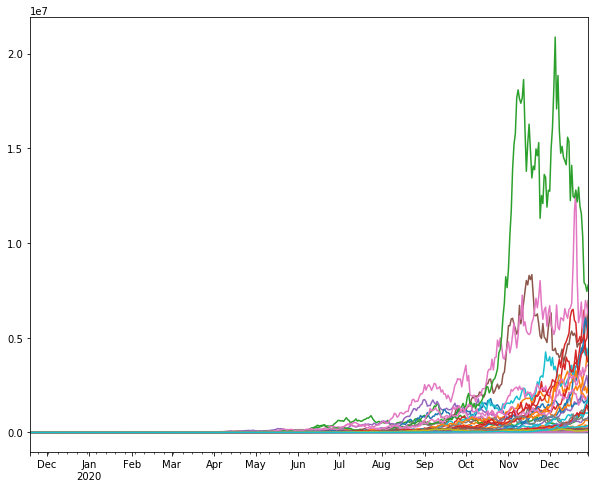

In [19]:
#Graficar
print("Esta gráfica representa el movimiento de los precios correspondientes a Apple Inc")
precios_simulador_A.plot(figsize=(10,8),legend=False);

Esta gráfica representa el movimiento de los precios correspondientes a Nokia Corporation


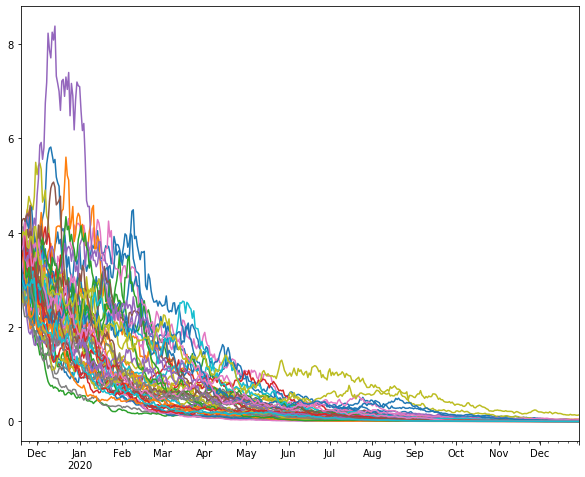

In [20]:
print("Esta gráfica representa el movimiento de los precios correspondientes a Nokia Corporation")
precios_simulador_N.plot(figsize=(10,8),legend=False);

Esta gráfica representa el movimiento de los precios correspondientes a SAMSUNG ELECTRONICS CO LTD.


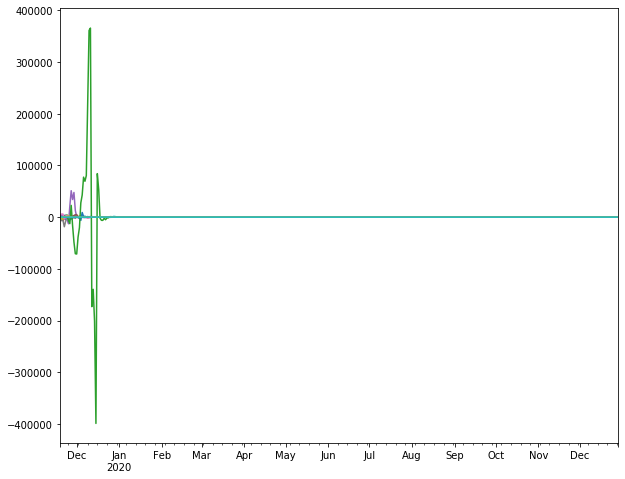

In [21]:
print("Esta gráfica representa el movimiento de los precios correspondientes a SAMSUNG ELECTRONICS CO LTD.")
precios_simulador_S.plot(figsize=(10,8),legend=False);

Esta gráfica representa el movimiento de los precios correspondientes a Motorola Solutions, Inc.


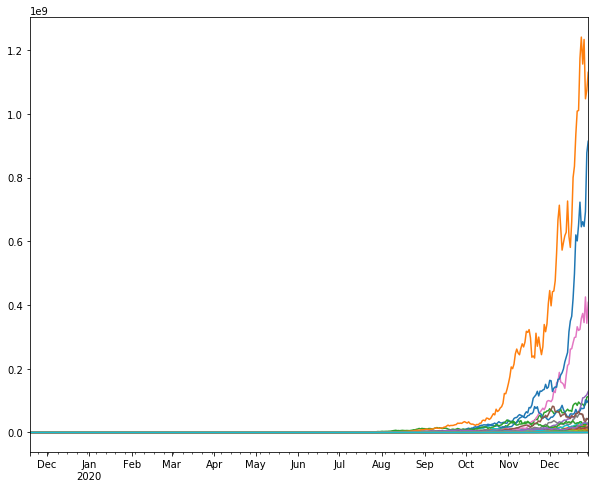

In [22]:
print("Esta gráfica representa el movimiento de los precios correspondientes a Motorola Solutions, Inc.")
precios_simulador_M.plot(figsize=(10,8),legend=False);

**PROBABILIDAD PRECIO UMBRAL**

Apple Umbral 110%


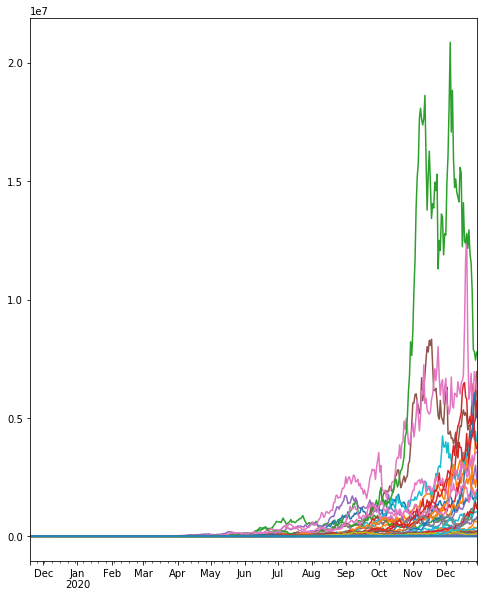

In [23]:
# Umbral de 110% del ultimo precio
KA = closes.iloc[-1].AAPL*1.1

# Fechas
dates = precios_simulador_A.index

# DataFrame de Umbrales
umbral = pd.DataFrame(index = dates,columns=['AAPL'],data=KA*np.ones(len(dates)))

# Concatenar y graficar
print('Apple Umbral 110%')
precios_simulador_KA = pd.concat([precios_simulador_A.T,umbral.T]).T
precios_simulador_KA.plot(figsize=(8,10),legend=False);

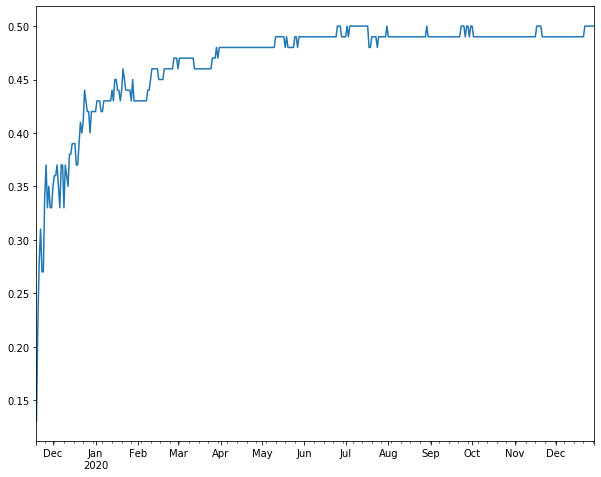

In [24]:
# Comparar cada escenario en cada fecha
TFA = precios_simulador_A > KA
#TF

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TFA.sum(axis=1)/100)


# Gráfico de probabilidad
prob.plot(figsize=(10,8),legend=False);

Nokia Umbral 110%


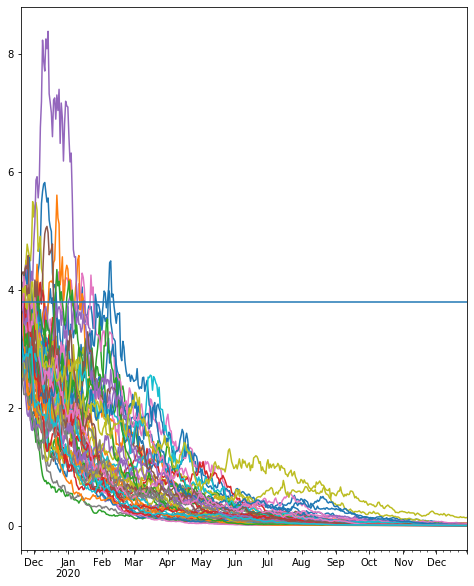

In [25]:
# Umbral de 110% del ultimo precio
KN = closes.iloc[-1].NOK*1.1

# Fechas
dates = precios_simulador_N.index

# DataFrame de Umbrales
umbral = pd.DataFrame(index = dates,columns=['NOK'],data=KN*np.ones(len(dates)))

# Concatenar y graficar
print('Nokia Umbral 110%')
precios_simulador_KN = pd.concat([precios_simulador_N.T,umbral.T]).T
precios_simulador_KN.plot(figsize=(8,10),legend=False);

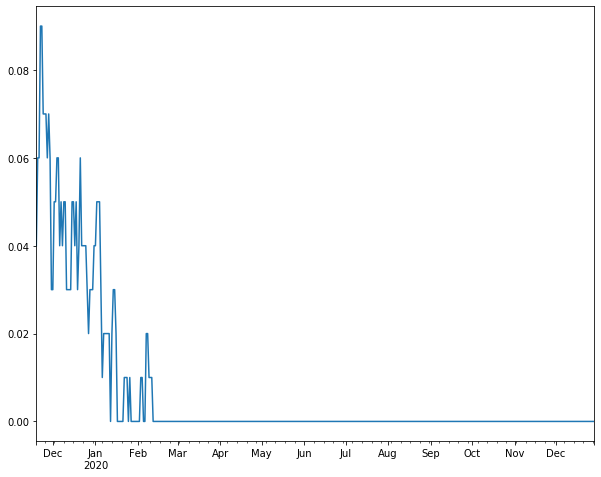

In [26]:
# Comparar cada escenario en cada fecha
TFN = precios_simulador_N > KN
#TF

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TFN.sum(axis=1)/100)



# Gráfico de probabilidad
prob.plot(figsize=(10,8),legend=False);

Samsung Umbral 110%


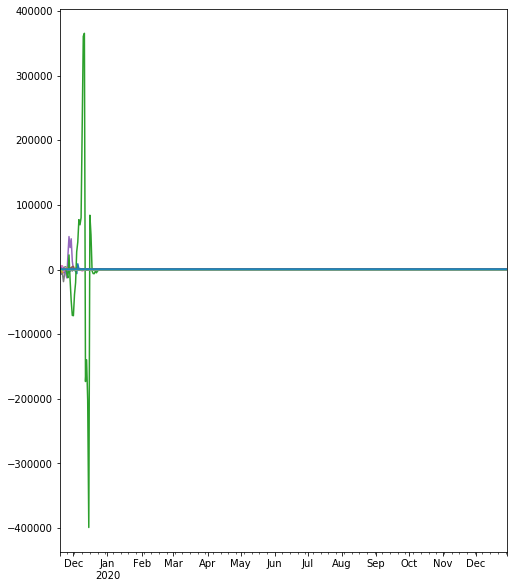

In [27]:
# Umbral de 110% del ultimo precio
KS = closes.iloc[-1]['SMSN.IL']*1.1

# Fechas
dates = precios_simulador_S.index

# DataFrame de Umbrales
umbral = pd.DataFrame(index = dates,columns=['SMSN.IL'],data=KS*np.ones(len(dates)))

# Concatenar y graficar
print('Samsung Umbral 110%')
precios_simulador_KS = pd.concat([precios_simulador_S.T,umbral.T]).T
precios_simulador_KS.plot(figsize=(8,10),legend=False);

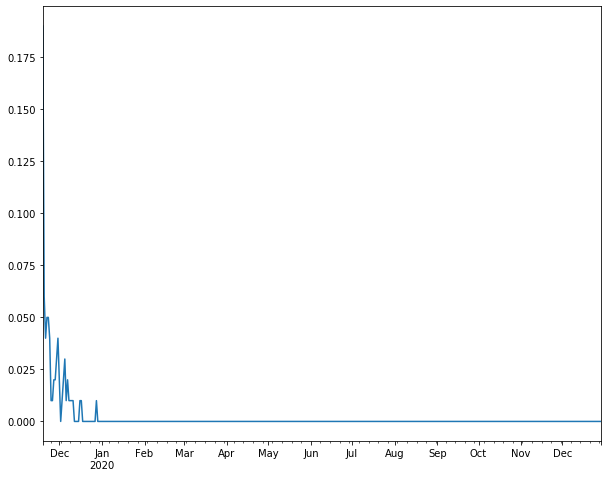

In [28]:
# Comparar cada escenario en cada fecha
TFS = precios_simulador_S > KS
#TF

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TFS.sum(axis=1)/100)



# Gráfico de probabilidad
prob.plot(figsize=(10,8),legend=False);

Motorola Umbral 110%


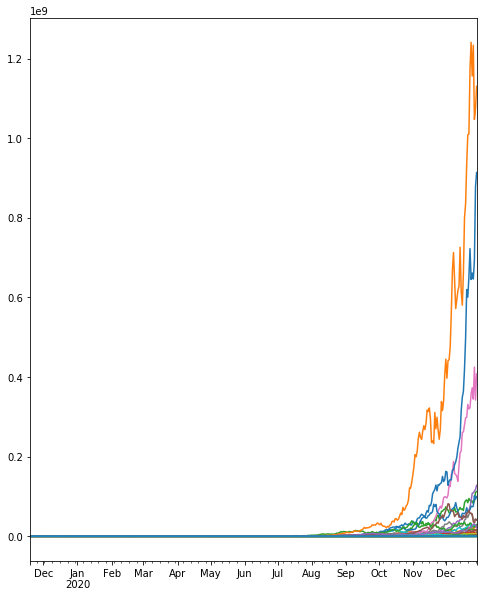

In [29]:
# Umbral de 110% del ultimo precio
KM = closes.iloc[-1]['MSI']*1.1

# Fechas
dates = precios_simulador_M.index

# DataFrame de Umbrales
umbral = pd.DataFrame(index = dates,columns=['MSI'],data=KM*np.ones(len(dates)))

# Concatenar y graficar
print('Motorola Umbral 110%')
precios_simulador_KM = pd.concat([precios_simulador_M.T,umbral.T]).T
precios_simulador_KM.plot(figsize=(8,10),legend=False);

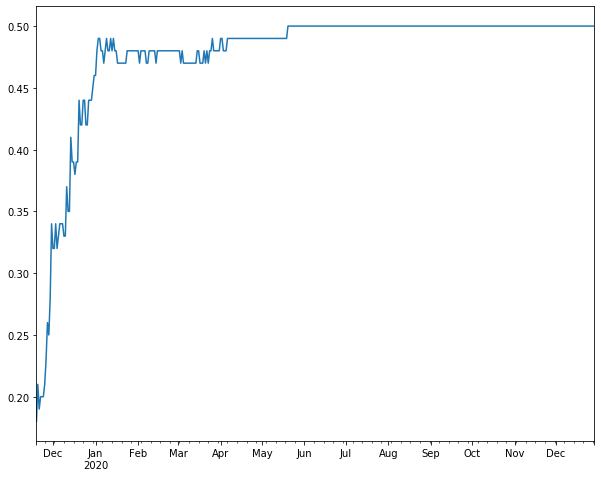

In [30]:
# Comparar cada escenario en cada fecha
TFM = precios_simulador_M > KM
#TF

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TFM.sum(axis=1)/100)



# Gráfico de probabilidad
prob.plot(figsize=(10,8),legend=False);

**Analísis de los resultados y conclusiones**

**Referencias**